# APE-MOM paper figures

This is a compilation of other diagnostic files to hold final figures for the APE-MOM paper.

In [6]:
%matplotlib inline
import os
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, shiftgrid

In [7]:
# function to do latitude shifting:
def shifted(input,geolon):
    ny,nx = geolon.shape
    shifted = np.zeros(input.shape)
    for j in range(ny):
        ii = np.max(np.where(geolon[j,:]<-180)) + 1
        shifted[j,(1440-ii):] = input[j,:ii]
        shifted[j,:(1440-ii)] = input[j,ii:]
    return shifted

In [15]:
datadir = '/g/data1/v45/APE-MOM/gfdl_nyf_1080_'

## Figure 2 - WindStress.pdf

/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/ocean_tau_x_540-549.nc
/g/data1/v45/APE-MOM/gfdl_nyf_1080_UP/ocean_tau_x_540-549.nc
/g/data1/v45/APE-MOM/gfdl_nyf_1080_SH/ocean_tau_x_540-549.nc
/g/data1/v45/APE-MOM/gfdl_nyf_1080_PI/ocean_tau_x_540-549.nc


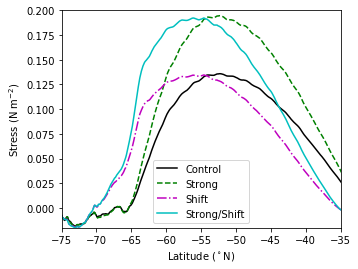

In [16]:
# Put all in this figure
cols = ['k','g','m','c']
lines = ['-','--','-.','-']
exp_names = ['cp','UP','SH','PI']
labels = ['Control','Strong','Shift','Strong/Shift']
plt.figure(figsize(5,4))

ii=-1
for fn in exp_names:
    ii+=1
    filename = datadir+fn+'/ocean_tau_x_540-549.nc' 
    print(filename)
    nc = Dataset(filename)
    tau = nc.variables['tau_x'][:,:,:]
    lat = nc.variables['yu_ocean'][:]
    nc.close()

    tau_bar = np.mean(tau,axis=2)[0,:]
    
    plt.plot(lat,tau_bar,linestyle=lines[ii],color=cols[ii],linewidth=1.5,label=labels[ii])

plt.xlim([-75,-35])
plt.ylim([-0.02,0.2])
plt.xlabel('Latitude ($^\circ$N)')
plt.ylabel('Stress (N m$^{-2}$)')
plt.legend(loc=8,fontsize=10)

plt.show()

## Figure 3 - MeanFields.pdf

/short/v45/jm0634/conda/envs/cosima/lib/python3.6/site-packages/numpy/ma/core.py:6468: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


OSError: No such file or directory

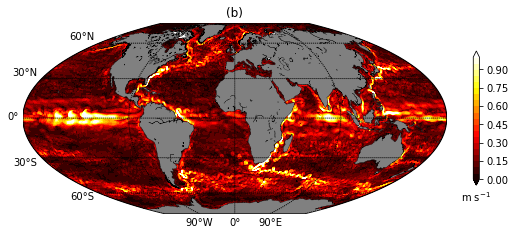

In [21]:
# Put all in this figure
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

datafile = Dataset(datadir+'cp/output501/ocean__501_363.nc','r')
geolon_c=datafile.variables['geolon_c'][:]
geolat_c=datafile.variables['geolat_c'][:]
geolon_t=datafile.variables['geolon_t'][:]
geolat_t=datafile.variables['geolat_t'][:]
u0=datafile.variables['u'][0,0,:,:]
v0=datafile.variables['v'][0,0,:,:]
datafile.close()
        
lon = shifted(geolon_c,geolon_c)
lat = shifted(geolat_c,geolon_c)

uv = (u0**2.0 + v0**2.0)**0.5
uv = shifted(uv,geolon_c)

plt.subplot(312)
lev = np.linspace(0,1.0,21)
map = Basemap(projection='mbtfpq',lon_0 = 0,resolution='l')
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
map.drawparallels(np.arange(-60.,61.,30.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,181.,90.),labels=[False,False,False,True])
X, Y = map(lon,lat) 
map.contourf(X,Y,uv, 20, cmap=plt.cm.hot,levels=lev,extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m s$^{-1}$')
plt.title('(b)')

datafile = Dataset(datadir+'cp/mean_ssh.nc','r')
sea_level=datafile.variables['sea_level'][0,:,:]
datafile.close()


datafile = Dataset(datadir+'cp/rho_ann_avge.nc','r')
pot_rho_2=datafile.variables['pot_rho_2'][0,0,:,:]
datafile.close()

lon = shifted(geolon_t,geolon_t)
lat = shifted(geolat_t,geolon_t)
ssh = shifted(sea_level,geolon_t)
rho = shifted(pot_rho_2,geolon_t)

plt.subplot(311)
lev = np.linspace(-2.0,1.0,11)
print (np.diff(lev))
map = Basemap(projection='mbtfpq',lon_0 = 0,resolution='l')
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
map.drawparallels(np.arange(-60.,61.,30.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,181.,90.),labels=[False,False,False,True])
X, Y = map(lon,lat) 
map.contour(X,Y,ssh, colors='k',linewidths=0.5,levels=lev) #CMRmap_r, gist_stern_r
lev = np.linspace(1029.8,1037.5,21)
map.contourf(X,Y,rho, cmap=plt.cm.rainbow_r,levels=lev,extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7,ticks=[1030, 1032, 1034, 1036])
cb.ax.set_xlabel('kg m$^{-3}$')
cb.ax.set_yticklabels(['1030', '1032', '1034', '1036'])
#cb.ax.yaxis.set_major_formatter(x_formatter)
plt.title('(a)')

nc = Dataset(datadir+'cp/resid_psi_rho.nc')
rho = nc.variables['potential_density'][:]
lat = nc.variables['latitude'][:]
psi = nc.variables['resid_psi'][:,:,:]
nc.close()

psi_bar_cp = np.mean(psi,0)
plt.subplot(313)
clev = np.arange(-20,20,2)
plt.contourf(lat,rho,psi_bar_cp,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,rho,psi_bar_cp,levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,rho,psi_bar_cp,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1033))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('(c)')
plt.gca().text(50, 1034.5, 'Upper Cell',color='k',
        bbox={'facecolor':'white', 'alpha':0.95, 'pad':5})
plt.gca().annotate('', xy=(40, 1036), xytext=(49, 1034.6),
            arrowprops=dict(facecolor='black', shrink=0.05,width=2,headwidth=8),
            )
plt.gca().annotate('', xy=(-20, 1036), xytext=(51.4, 1034.6),
            arrowprops=dict(facecolor='black', shrink=0.05,width=2,headwidth=8),
            )
plt.gca().text(-70, 1035, 'Lower Cell',color='k',
        bbox={'facecolor':'white', 'alpha':0.95, 'pad':5})
plt.gca().annotate('', xy=(-65, 1036.95), xytext=(-69, 1035.05),
            arrowprops=dict(facecolor='black', shrink=0.05,width=2,headwidth=8),
            )



## Figure 4 - BasicStats.pdf

IndexError: index 14 is out of bounds for axis 0 with size 1

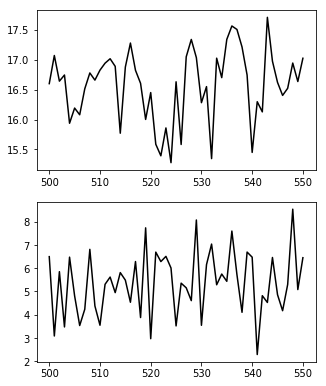

In [28]:
###### Look at temporal response
cols = ['k','g','m','c']
lines = ['-','--','-.','-']
exp_names = ['cp','UP','SH','PI']
labels = ['Control','Strong','Shift','Strong/Shift']
plt.figure(figsize(5,10))


# average between i1 and i2
i1 = 600
i2=610
j1 = 230
j2=235
ii=-1
for fn in exp_names:
    ii+=1
    filename = datadir+fn+'/resid_psi_rho.nc' 
    nc = Dataset(filename)
    T = nc.variables['time'][:]
    rho = nc.variables['potential_density'][:]
    lat = nc.variables['latitude'][:]
    psi = nc.variables['resid_psi'][:,55:,i1:i2]
    psj = nc.variables['resid_psi'][:,:,j1:j2]
    nc.close()
    
    psi_bar = np.mean(psi,2)
    psi_ts = np.max(psi_bar,1)
    
    # Add year 500
    T = np.insert(T,0,500.)
    psi_ts = np.insert(psi_ts,0,16.6)
    plt.subplot(311)
    plt.plot(T,psi_ts,linestyle=lines[ii],color=cols[ii],linewidth=1.5)
    
    # do lower cell
    psj_bar = np.mean(psj,2)
    psj_ts = -np.min(psj_bar[:,50:],1)
    psj_ts = np.insert(psj_ts,0,6.5)
    plt.subplot(312)
    plt.plot(T,psj_ts,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)
        
    filename = datadir+fn+'/DPTrans.npz' 
    data=np.load(filename)
    Time = data['time']
    DPTrans = data['DPTrans']
    nyrs = Time.shape[0]//20
    DPTrans_AA = np.reshape(DPTrans,(nyrs,20)).mean(1)
    Time_AA = np.reshape(Time,(nyrs,20)).mean(1)
    if ii==0:
        DP500 = DPTrans_AA[14]
        T500 =Time_AA[14]
    else:
        DPTrans_AA = np.insert(DPTrans_AA,0,DP500)
        Time_AA = np.insert(Time_AA,0,T500)
    plt.subplot(313)
    plt.plot(Time_AA,DPTrans_AA,linestyle=lines[ii],color=cols[ii],linewidth=1.5)
    
    ## THESE PANELS DELETED AT LAST MOMENT!
    #plt.subplot(222)
    #x1 = np.mean(np.reshape(psi_ts[-50:],(10,5)),axis=1)
    #y1 = np.mean(np.reshape(DPTrans_AA[-50:],(10,5)),axis=1)
    #plt.plot(x1,y1,'.',linestyle='-',color=cols[ii],markersize=10,linewidth=0.75)
    
    
    #plt.subplot(224)
    #x1 = np.mean(np.reshape(psj_ts[-50:],(10,5)),axis=1)
    #plt.plot(x1,y1,'.',linestyle='-',color=cols[ii],label=labels[ii],markersize=10,linewidth=0.75)
    
plt.legend()
print ("Bounding latitudes of psi average:", lat[i1], lat[i2])
print ("Bounding latitudes of psi_lower average:", lat[j1], lat[j2])
    
plt.subplot(311)
plt.ylabel('Upper Overturning (Sv)')
#plt.xlabel('Time (years)')
plt.title('(a)')

plt.subplot(313)
plt.ylabel('DP Transport (Sv)')
plt.xlabel('Time (years)')
plt.title('(c)')
plt.xlim([500,550])

plt.subplot(312)
plt.ylabel('Lower Overturning (Sv)')
#plt.xlabel('Time (years)')
plt.title('(b)')
plt.legend(fontsize=10)


#plt.savefig('figures/BasicStats.pdf')

## Figure 5 - MLD.pdf

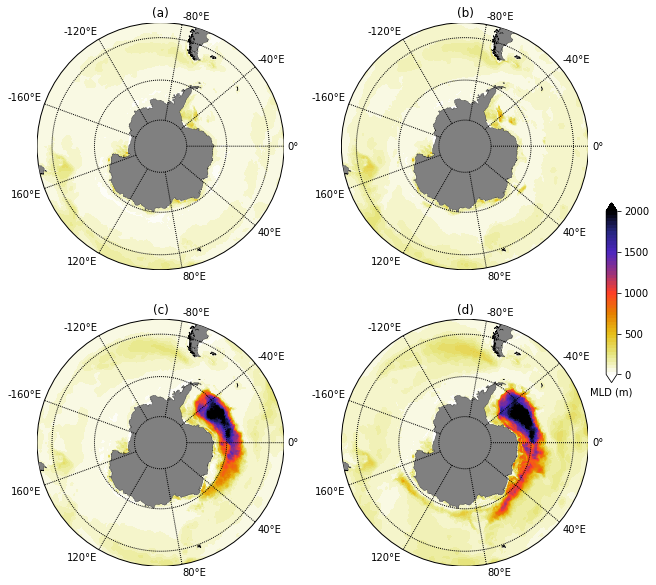

In [30]:
exp_names = ['cp','UP','SH','PI']
labels = ['(a)','(b)','(c)','(d)']
plt.figure(figsize(10,10))

ii=-1
levels = np.linspace(0,2000,50)
for fn in exp_names:
    ii += 1
    filename = datadir+fn+'/ocean_mld_510-519.nc' 
    nc = Dataset(filename)
    mld = nc.variables['mld'][0,:,:]
    #yt = nc.variables['yt_ocean'][:]
    #xt = nc.variables['xt_ocean'][:]
    nc.close()
    
    plt.subplot(2,2,ii+1)
    map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    map.drawparallels(np.arange(-80.,81.,15.))
    map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,mld, cmap=plt.cm.CMRmap_r, levels=levels, extend='both') #CMRmap_r, gist_stern_r
    plt.title(labels[ii])


ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',ticks=[0, 500, 1000, 1500, 2000] )
cb.ax.set_xlabel('MLD (m)')

#plt.savefig('figures/MLD.pdf')
#plt.savefig('figures/MLD.png',dpi=220)

## Figure 6 - GlobalEnergy.pdf

OSError: No such file or directory

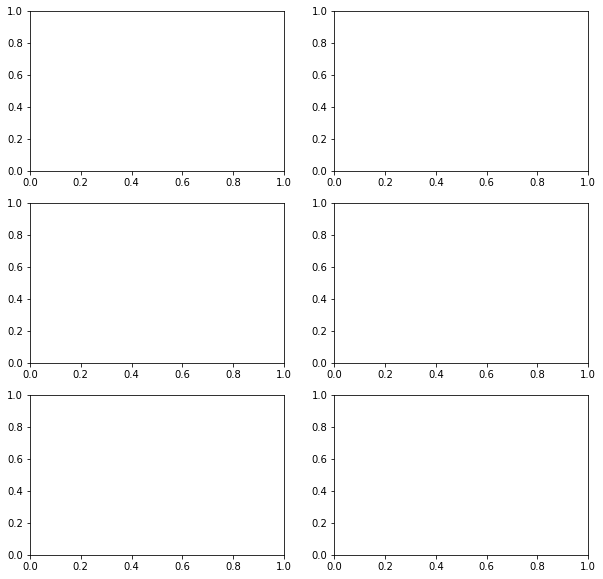

In [31]:
# Look at temporal response
cols = ['k','g','m','c']
lines = ['-','--','-.','-']
exp_names = ['cp','UP','SH','PI']
labels = ['Control','Strong','Shift','Strong/Shift']
plt.figure(figsize=(10,10))
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(3,2,figsize=(10,10))


ii=-1
for fn in exp_names:
    ii += 1
    filename = datadir+fn+'/ape_v1.nc' 
    nc = Dataset(filename)
    T = nc.variables['T'][:]/365.
    APE = nc.variables['Available_Potential_Energy']
    KE = nc.variables['Kinetic_Energy']
    Phi_tau = nc.variables['Phi_tau'][:]
    Phi_z = nc.variables['Phi_z'][:]
    Phi_d1 = nc.variables['Phi_d1'][:]
    Phi_d2 = nc.variables['Phi_d2'][:]
    Phi_c1 = nc.variables['Phi_c1'][:]
    Phi_c2 = nc.variables['Phi_c2'][:]
    Phi_b1 = nc.variables['Phi_b1'][:]
    Phi_b2 = nc.variables['Phi_b2'][:]

    nyrs = T.shape[0]/73
    T_AA = T[36::73]
    APE_AA = np.reshape(APE,(nyrs,73)).mean(1)
    KE_AA = np.reshape(KE,(nyrs,73)).mean(1)
    Phi_tau_AA = np.reshape(Phi_tau,(nyrs,73)).mean(1)
    Phi_b_AA = np.reshape(Phi_b1-Phi_b2,(nyrs,73)).mean(1)
    Phi_z_AA = np.reshape(Phi_z,(nyrs,73)).mean(1)
    Phi_d_AA = np.reshape(Phi_d1-Phi_d2,(nyrs,73)).mean(1)
    Phi_c_AA = np.reshape(Phi_c1-Phi_c2,(nyrs,73)).mean(1)
    nc.close()
    dAPEdt = Phi_z_AA +Phi_d_AA + Phi_c_AA + Phi_b_AA


    plt.subplot(421)
    plt.plot(T_AA,KE_AA,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)
    plt.subplot(422)
    plt.plot(T_AA,APE_AA,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)
    
    plt.subplot(423)
    plt.plot(T_AA,Phi_tau_AA,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)
    plt.subplot(424)
    plt.plot(T_AA,Phi_b_AA,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)
    plt.subplot(425)
    plt.plot(T_AA,Phi_z_AA,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)
    plt.subplot(426)
    plt.plot(T_AA,Phi_d_AA,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)
    plt.subplot(427)
    plt.plot(T_AA,Phi_c_AA,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)  
    plt.subplot(428)
    plt.plot(T_AA,dAPEdt,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)    
    
plt.subplot(421)
plt.title('(a)')
plt.ylabel('KE (J/kg)')
plt.xlim([498,550])

plt.subplot(422)
plt.title('(b)')
plt.ylabel('APE (J/kg)')
plt.xlim([498,550])

plt.subplot(423)
plt.title('(c)')
plt.ylabel('Wind Power Input (W/kg)')
plt.xlim([498,550])

plt.subplot(424)
plt.title('(d)')
plt.ylabel('Buoyancy Power Input (W/kg)')
#ax3.set_xlabel('Time (years)')
plt.xlim([498,550])
plt.legend(fontsize=10)

plt.subplot(425)
plt.title('(e)')
plt.ylabel('KE to APE Conversion (W/kg)')
#plt.xlabel('Time (years)')
plt.xlim([498,550])

plt.subplot(426)
plt.title('(f)')
plt.ylabel('Diffusion (W/kg)')
plt.xlim([498,550])
#plt.tick_params(labelbottom='off') 

plt.subplot(427)
plt.title('(g)')
plt.ylabel('Convection (W/kg)')
plt.xlabel('Time (years)')
plt.xlim([498,550])


plt.subplot(428)
plt.title('(h)')
plt.ylabel('dAPE/dt (W/kg)')
plt.xlabel('Time (years)')
plt.xlim([498,550])

#plt.savefig('figures/GlobalEnergy.pdf')


## Figure 7 - GlobalLAPE.pdf

In [32]:
data=np.load(datadir+'cp/lape.npz' )
lape_cp_mean = data['lape_cp_mean']
    
lon = shifted(geolon_t,geolon_t)
lat = shifted(geolat_t,geolon_t)
lape_cp_mean = shifted(lape_cp_mean,geolon_t)

fig=plt.figure(figsize(13.5,6))
levels = np.linspace(np.log10(10/1030.),np.log10(30000/1030.),66)
map = Basemap(projection='mbtfpq',lon_0 = 0,resolution='l')
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
map.drawparallels(np.arange(-80.,81.,20.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True])
X, Y = map(lon,lat) 
map.contourf(X,Y,np.log10(lape_cp_mean/1030), cmap=plt.cm.CMRmap_r, levels=levels, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.5,ticks=[-2, -1, 0, 1])
cb.ax.set_xlabel('log$_{10}$(APE) (J/kg)')

#plt.savefig('figures/GlobalLAPE.pdf')
#plt.savefig('figures/GlobalLAPE.png',dpi=144)

FileNotFoundError: [Errno 2] No such file or directory: '/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/lape.npz'

## Figure 8 - SH_LAPE.pdf

FileNotFoundError: [Errno 2] No such file or directory: '/g/data1/v45/APE-MOM/gfdl_nyf_1080_UP/lape.npz'

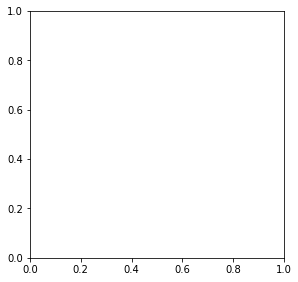

In [42]:
cols = ['k','g','m','c']
lines = ['-','--','-.','-']
exp_names = ['cp','UP','SH','PI']
labels = ['Control','Strong','Shift','Strong/Shift']
plt.figure(figsize(10,10))

plt.subplot(221)
data=np.load(datadir+'UP/lape.npz' )
lape_UP_diff = data['lape_UP_diff']/1030.    ## Divide by rho_0
levels = np.linspace(-5,5,66)

map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
map.contourf(X,Y,lape_UP_diff, cmap=plt.cm.PuOr, levels=levels, extend='both') #CMRmap_r, gist_stern_r
#cb = plt.colorbar(orientation='vertical',shrink = 0.5,ticks=[-4000, -2000, 0, 2000, 4000 ])
plt.title('(a)')


plt.subplot(222)
data=np.load(datadir+'SH/lape.npz' )
lape_SH_diff = data['lape_SH_diff']/1030.    ## Divide by rho_0

map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
map.contourf(X,Y,lape_SH_diff, cmap=plt.cm.PuOr, levels=levels, extend='both') #CMRmap_r, gist_stern_r
#cb = plt.colorbar(orientation='vertical',shrink = 0.5,ticks=[-4000, -2000, 0, 2000, 4000 ])
plt.title('(b)')


plt.subplot(223)
data=np.load(datadir+'PI/lape.npz' )
lape_PI_diff = data['lape_PI_diff']/1030.    ## Divide by rho_0

map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,lape_PI_diff, cmap=plt.cm.PuOr, levels=levels, extend='both') #CMRmap_r, gist_stern_r
#cb = plt.colorbar(orientation='vertical',shrink = 0.5,ticks=[-4000, -2000, 0, 2000, 4000 ])
plt.title('(c)')

lape_zm_UP = np.mean(lape_UP_diff,1)
lape_zm_PI = np.mean(lape_PI_diff,1)
lape_zm_SH = np.mean(lape_SH_diff,1)

plt.subplot(224)
plt.plot(geolat_t[:498,0],lape_zm_UP[:498],linestyle=lines[1],color=cols[1],label=labels[1],linewidth=1.5)
plt.plot(geolat_t[:498,0],lape_zm_SH[:498],linestyle=lines[2],color=cols[2],label=labels[2],linewidth=1.5)
plt.plot(geolat_t[:498,0],lape_zm_PI[:498],linestyle=lines[3],color=cols[3],label=labels[3],linewidth=1.5)
plt.legend(fontsize=10)
plt.xlim([-76,-45])
plt.ylim([-2.5, 2.5])
plt.xlabel('Latitude ($^\circ$N)')
plt.ylabel('$\Delta$ APE (J/kg)')
plt.title('(d)')

ax3 = plt.axes([0.09,0.39,0.015,0.23])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',ticks=[-5, -2.5, 0, 2.5, 5])
cb.ax.set_ylabel('$\Delta$ APE (J/kg)')

#plt.savefig('figures/SH_LAPE.pdf')
#plt.savefig('figures/SH_LAPE.png',dpi=220)

## Figure 9 - NH_LAPE.pdf

FileNotFoundError: [Errno 2] No such file or directory: '/g/data1/v45/APE-MOM/gfdl_nyf_1080_UP/lape_NH.npz'

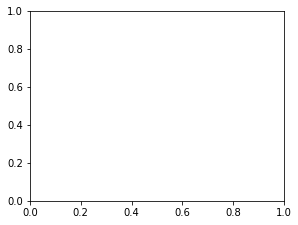

In [39]:
cols = ['k','g','m','c']
lines = ['-','--','-.','-']
exp_names = ['cp','UP','SH','PI']
labels = ['Control','Strong','Shift','Strong/Shift']
plt.figure(figsize(10,3.5))

# bounds of meridional average
## 700 - 825 isolates subpolar gyre
l1 = 800
l2 = 1050
m1 = 920
m2 = 1340

plt.subplot(121)
data=np.load(datadir+'UP/lape_NH.npz' )
lape_UP_diff = data['lape_UP_diff']/1030.    ## Divide by rho_0
lape_UP_GIN = data['lape_UP_GIN']/1030.    ## Divide by rho_0
time = data['time']    

lape_plot = np.mean(lape_UP_diff[39:,l1:l2,m1:m2],axis=0)

levels = np.linspace(-5,5,66)
map = Basemap(llcrnrlon=-33,llcrnrlat=63,urcrnrlon=39,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
X, Y = map(geolon_t[l1:l2,m1:m2],geolat_t[l1:l2,m1:m2]) 
map.contourf(X,Y,lape_plot, cmap=plt.cm.PuOr, levels=levels, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.5,ticks=[-4, -2, 0, 2, 4 ])
cb.ax.set_xlabel('$\Delta$ APE\n (J/kg)')
plt.title('(a)')

plt.subplot(122)
data=np.load('data/SH/lape_NH.npz' )
lape_SH_GIN = data['lape_SH_GIN']/1030.    ## Divide by rho_0
data=np.load('data/PI/lape_NH.npz' )
lape_PI_GIN = data['lape_PI_GIN']/1030.    ## Divide by rho_0

plt.plot(time/365,lape_UP_GIN,color=cols[1],linestyle=lines[1],label=labels[1],linewidth=1.5)
plt.plot(time/365,lape_SH_GIN,color=cols[2],linestyle=lines[2],label=labels[2],linewidth=1.5)
plt.plot(time/365,lape_PI_GIN,color=cols[3],linestyle=lines[3],label=labels[3],linewidth=1.5)

plt.legend(loc=2,fontsize=10)
plt.ylim([-0.5, 1])
plt.xlabel('Time (years)')
plt.ylabel('$\Delta$ APE (J/kg)')
plt.title('(b)')

#plt.savefig('figures/NH_LAPE.pdf')
#plt.savefig('figures/NH_LAPE.png',dpi=144)


## Figure 10 - ResidPsi.pdf

In [38]:
fig = plt.figure(figsize=(13,8))
exp_names = ['UP','SH','PI']
titles=['(a)','(b)','(c)','(d)','(e)','(f)']
lev = np.linspace(-20,20,10)
clev = np.linspace(-10,10,20)
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

# first do years 15-25
i1 = 15
i2 = 25
ii = 0
for fn in exp_names:
    ii += 1
    filename = 'data/'+fn+'/resid_psi_rho.nc' 
    nc = Dataset(filename)
    T = nc.variables['time'][:]
    rho = nc.variables['potential_density'][:]
    lat = nc.variables['latitude'][:]
    psi = nc.variables['resid_psi'][:,:,:]
    nc.close()
    
    psi_bar = np.mean(psi[i1:i2,:,:],0) - psi_bar_cp
    plt.subplot(2,3,ii)
    plt.contourf(lat,rho,psi_bar,cmap=plt.cm.PRGn,levels=clev,extend='both')
    plt.contour(lat,rho,psi_bar_cp,levels=lev,colors='k',linewidths=0.25)
    plt.contour(lat,rho,psi_bar_cp,levels=[0, ],colors='k',linewidths=1)
    plt.gca().invert_yaxis()
    plt.ylim((1037.2,1033))
    plt.xlim([-75,85])
    plt.title(titles[ii-1])
    plt.gca().yaxis.set_major_formatter(x_formatter)

plt.subplot(231)
plt.ylabel('Potential Density (kg m$^{-3}$)')
# first do years 15-25
i1 = 40
i2 = 50
for fn in exp_names:
    ii += 1
    filename = datadir+fn+'/resid_psi_rho.nc' 
    nc = Dataset(filename)
    T = nc.variables['time'][:]
    rho = nc.variables['potential_density'][:]
    lat = nc.variables['latitude'][:]
    psi = nc.variables['resid_psi'][:,:,:]
    nc.close()
    
    psi_bar = np.mean(psi[i1:i2,:,:],0) - psi_bar_cp
    plt.subplot(2,3,ii)
    p2=plt.contourf(lat,rho,psi_bar,cmap=plt.cm.PRGn,levels=clev,extend='both')
    plt.contour(lat,rho,psi_bar_cp,levels=lev,colors='k',linewidths=0.25)
    plt.contour(lat,rho,psi_bar_cp,levels=[0, ],colors='k',linewidths=1)
    plt.gca().invert_yaxis()
    plt.ylim((1037.2,1033))
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75,85])
    plt.title(titles[ii-1])
    plt.gca().yaxis.set_major_formatter(x_formatter)



plt.subplot(234)
plt.ylabel('Potential Density (kg m$^{-3}$)')

ax4 = plt.axes([0.935,0.3,0.011,0.4])
cb = plt.colorbar(p2,cax=ax4,orientation='vertical',ticks=[-10,-5,0,5,10])
cb.ax.set_xlabel('Sv')

#plt.savefig('figures/ResidPsi.pdf')
#plt.savefig('figures/ResidPsi.png',dpi=220)



OSError: No such file or directory

## Figure 11 - DepthDensityPsi.pdf

OSError: No such file or directory

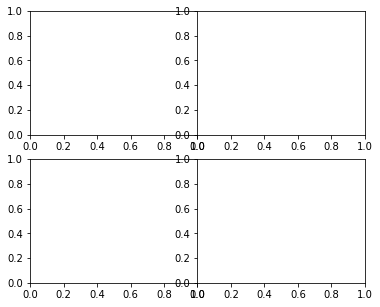

In [36]:
## First, take CP and plot total, mean and eddy streamfunction in N and S hemispheres
fig, ax = plt.subplots(2,2,figsize=(6,5))
subplots_adjust(wspace=0)
clev = np.linspace(-20,20,41)
dlev = np.linspace(-10,10,30)
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
titles=['(a)','(b)','(c)','(d)']


filename = 'data/cp/rhoz_moc.nc'
nc = Dataset(filename)
T = nc.variables['time'][:]
rho = nc.variables['rhobin'][:]
z = nc.variables['st_ocean'][:]
trans_south = nc.variables['rho_z_trans_south'][:,:,:]
trans_north = nc.variables['rho_z_trans_north'][:,:,:]
nc.close()

# Load equatorial density file
filename = datadir+'cp/ocean_541-550.nc'
nc = Dataset(filename)
Equator_Rho = nc.variables['pot_rho_2'][0,:,497,:]
nc.close()
Eq_Max_Rho = np.ma.max(Equator_Rho,axis=1)

trans_south_total = np.mean(trans_south,0)
trans_north_total = np.mean(trans_north,0)

psi_south_total_cp = np.cumsum(trans_south_total[:,::-1],1)[:,::-1]
psi_north_total_cp = np.cumsum(trans_north_total[:,::-1],1)[:,::-1]

# Plot density contours in x-z space.
ax0=ax[1,0]
ax1=ax[1,1]
ax1.set_yticklabels('')
p1=ax0.contourf(rho,z,psi_south_total_cp,cmap=plt.cm.PiYG,levels=clev,extend='both')
ax0.contour(rho,z,psi_south_total_cp,colors='k',levels=clev[::3],linewidths=0.25)
ax0.contour(rho,z,psi_south_total_cp,colors='k',levels=[0,],linewidths=1)
ax0.plot(Eq_Max_Rho,z,'gray',linewidth=2)
ax0.invert_yaxis()
ax0.set_xlim((1037.2,1034.5))
ax0.set_ylim((4500,0))
ax0.set_yticks([4000,3000,2000, 1000, 0])
ax0.set_ylabel('Depth (m)')
ax0.set_xticks([1035,1036,1037])
ax0.xaxis.set_major_formatter(x_formatter)
mc=ax1.contourf(rho,z,-psi_north_total_cp,cmap=plt.cm.PiYG,levels=clev,extend='both')
ax1.contour(rho,z,-psi_north_total_cp,colors='k',levels=clev[::3],linewidths=0.25)
ax1.contour(rho,z,-psi_north_total_cp,colors='k',levels=[0,],linewidths=1)
ax1.plot(Eq_Max_Rho,z,'gray',linewidth=2)
ax1.invert_yaxis()
ax1.set_ylim((4500,0))
ax1.set_yticks([4000,3000,2000, 1000, 0])
ax1.set_xlim((1037.2,1034.5))
ax1.invert_xaxis()
ax1.set_xticks([1035,1036,1037])
ax1.xaxis.set_major_formatter(x_formatter)
ax1.set_title(titles[1],loc='left', horizontalalignment='center')
ax1.set_xlabel('Potential Density (kg m$^{-3}$)')#,loc='left', horizontalalignment='center')
ax0.set_xlabel('Potential Density (kg m$^{-3}$)')

# Plot density contours in x-z space.
fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
ax2 = plt.axes([0.25,0.56,0.5, 0.36])
p1=ax2.contourf(rho,z,psi_south_total_cp + psi_north_total_cp,cmap=plt.cm.PiYG,levels=clev,extend='both')
ax2.contour(rho,z,psi_south_total_cp + psi_north_total_cp,colors='k',levels=clev[::3],linewidths=0.25)
#ax2.contour(rho,z,psi_south_total_cp + psi_north_total_cp,colors='k',levels=[0,],linewidths=1)
ax2.invert_yaxis()
ax2.set_xlim((1037.2,1034.5))
ax2.set_ylim((4500,0))
ax2.set_yticks([4000,3000,2000, 1000, 0])
ax2.set_ylabel('Depth (m)')
ax2.set_xticks([1035,1036,1037])
ax2.xaxis.set_major_formatter(x_formatter)
ax2.set_title(titles[0])

ax3 = plt.axes([0.8,0.6,0.015,0.3])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',ticks=[-20,-10,0,10,20])
cb.ax.set_xlabel('Sv')
    
#plt.savefig('figures/DepthDensityPsi.pdf')
#plt.savefig('figures/DepthDensityPsi.png',dpi=220)

## Figure 12 - DepthDensity2.pdf

NameError: name 'psi_south_total_cp' is not defined

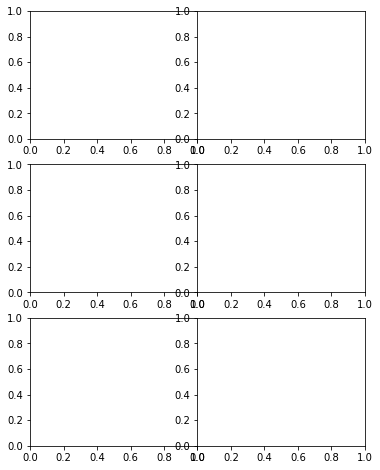

In [35]:
## First, take CP and plot total, mean and eddy streamfunction in N and S hemispheres
fig, ax = plt.subplots(3,2,figsize=(6,8))
subplots_adjust(wspace=0)
clev = np.linspace(-20,20,41)
dlev = np.linspace(-10,10,30)
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
titles=['(a)','(b)','(c)','(d)']
# now loop over these
exp_names = ['UP','SH','PI']
ii=0
i1 = 40
i2 = 50
for fn in exp_names:
    ii += 1
    filename = datadir+fn+'/rhoz_moc.nc' 
    nc = Dataset(filename)
    T = nc.variables['time'][:]
    rho = nc.variables['rhobin'][:]
    z = nc.variables['st_ocean'][:]
    trans_south = nc.variables['rho_z_trans_south'][:,:,:]
    trans_north = nc.variables['rho_z_trans_north'][:,:,:]
    nc.close()
        
    trans_south_total = np.mean(trans_south[i1:i2,:,:],0)
    trans_north_total = np.mean(trans_north[i1:i2,:,:],0)

    psi_south_total = np.cumsum(trans_south_total[:,::-1],1)[:,::-1]
    psi_north_total = np.cumsum(trans_north_total[:,::-1],1)[:,::-1]
    
    
    ax0=ax[ii-1,0]
    ax1=ax[ii-1,1]
    p2=ax0.contourf(rho,z,psi_south_total - psi_south_total_cp,cmap=plt.cm.PRGn,levels=dlev,extend='both')
    ax0.contour(rho,z,psi_south_total_cp,colors='k',levels=clev[::3],linewidths=0.25)
    ax0.contour(rho,z,psi_south_total_cp,colors='k',levels=[0,],linewidths=1)
    ax0.plot(Eq_Max_Rho,z,'gray',linewidth=2)
    ax0.invert_yaxis()
    ax0.set_xlim((1037.2,1034.5))
    ax0.set_ylim((4500,0))
    ax0.set_xticks([1035,1036,1037])
    ax0.set_yticks([4000,3000,2000, 1000, 0])
    ax0.xaxis.set_major_formatter(x_formatter)
    ax0.set_ylabel('Depth (m)')
    mc=ax1.contourf(rho,z,-psi_north_total+psi_north_total_cp,cmap=plt.cm.PRGn,levels=dlev,extend='both')
    ax1.contour(rho,z,-psi_north_total_cp,colors='k',levels=clev[::3],linewidths=0.25)
    ax1.contour(rho,z,-psi_north_total_cp,colors='k',levels=[0,],linewidths=1)
    ax1.plot(Eq_Max_Rho,z,'gray',linewidth=1)
    ax1.invert_yaxis()
    ax1.set_xlim((1037.2,1034.5))
    ax1.invert_xaxis()
    ax1.set_yticklabels('')
    ax1.set_ylim((4500,0))
    ax1.set_yticks([4000,3000,2000, 1000, 0])
    ax1.set_xticks([1035,1036,1037])
    ax1.xaxis.set_major_formatter(x_formatter)
    ax1.set_title(titles[ii-1],loc='left', horizontalalignment='center')

ax1.set_xlabel('Potential Density (kg m$^{-3}$)')#,loc='left', horizontalalignment='center')
ax0.set_xlabel('Potential Density (kg m$^{-3}$)')

ax4 = plt.axes([0.93,0.325,0.015,0.35])
cb = plt.colorbar(p2,cax=ax4,orientation='vertical',ticks=[-10,-5,0,5,10])
cb.ax.set_xlabel('Sv')

#plt.savefig('figures/DepthDensityPsi2.pdf')
#plt.savefig('figures/DepthDensityPsi2.png',dpi=220)

## Figure 13 - SH-EddyMean.pdf

In [34]:
## First, take CP and plot total, mean and eddy streamfunction in N and S hemispheres
clev = np.linspace(-30,30,41)
print (np.diff(clev[::3]))
dlev = np.linspace(-15,15,30)
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
titles=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']

# Look at middle 10 years, 
i1 = 20
i2 = 30
ii = 0
jj = 2 # 3rd decade
exp_names = ['UP','SH','PI']

# Get CP data
filename = datadir+'cp/rhoz_moc_mean.nc'
nc = Dataset(filename)
T = nc.variables['time'][:]
rho = nc.variables['rhobin'][:]
z = nc.variables['st_ocean'][:]
trans_south = nc.variables['rho_z_trans_south'][:,:,:]
nc.close()

trans_south_mean = np.mean(trans_south,0)
psi_south_mean_cp = np.cumsum(trans_south_mean[:,::-1],1)[:,::-1]
psi_south_eddy_cp = psi_south_total_cp - psi_south_mean_cp


fig, ax = plt.subplots(3,3,figsize=(10,10))

for fn in exp_names:
    ii += 1
    filename = 'data/'+fn+'/rhoz_moc.nc' 
    nc = Dataset(filename)
    T = nc.variables['time'][:]
    rho = nc.variables['rhobin'][:]
    z = nc.variables['st_ocean'][:]
    trans_south = nc.variables['rho_z_trans_south'][:,:,:]
    nc.close()
        
    trans_south_total = np.mean(trans_south[i1:i2,:,:],0)

    psi_south_total = np.cumsum(trans_south_total[:,::-1],1)[:,::-1]
    
    filename = 'data/'+fn+'/rhoz_moc_mean.nc' 
    nc = Dataset(filename)
    T = nc.variables['time'][:]
    rho = nc.variables['rhobin'][:]
    z = nc.variables['st_ocean'][:]
    trans_south = nc.variables['rho_z_trans_south'][:,:,:]
    nc.close()
        
    trans_south_mean = trans_south[jj,:,:]

    psi_south_mean = np.cumsum(trans_south_mean[:,::-1],1)[:,::-1]
    
    psi_south_eddy = psi_south_total - psi_south_mean
    
    ax0=ax[ii-1,0]
    ax1=ax[ii-1,1]
    ax2=ax[ii-1,2]
    p2=ax0.contourf(rho,z,psi_south_total - psi_south_total_cp,cmap=plt.cm.PRGn,levels=dlev,extend='both')
    ax0.contour(rho,z,psi_south_total_cp,colors='k',levels=clev[::3],linewidths=0.25)
    ax0.contour(rho,z,psi_south_total_cp,colors='k',levels=[0,],linewidths=1)
    ax0.plot(Eq_Max_Rho,z,'gray',linewidth=2)
    ax0.invert_yaxis()
    ax0.set_xlim((1037.2,1034.5))
    ax0.set_ylim((4500,0))
    ax0.set_xticks([1035,1036,1037])
    ax0.set_yticks([4000,3000,2000, 1000, 0])
    ax0.xaxis.set_major_formatter(x_formatter)
    ax0.set_ylabel('Depth (m)')
    ax0.set_title(titles[(ii-1)*3])
    mc=ax1.contourf(rho,z,psi_south_mean - psi_south_mean_cp,cmap=plt.cm.PRGn,levels=dlev,extend='both')
    ax1.contour(rho,z,psi_south_mean_cp,colors='k',levels=clev[::3],linewidths=0.25)
    ax1.contour(rho,z,psi_south_mean_cp,colors='k',levels=[0,],linewidths=1)
    ax1.plot(Eq_Max_Rho,z,'gray',linewidth=2)
    ax1.invert_yaxis()
    ax1.set_xlim((1037.2,1034.5))
    ax1.set_ylim((4500,0))
    ax1.set_xticks([1035,1036,1037])
    ax1.set_yticks([4000,3000,2000, 1000, 0])
    ax1.xaxis.set_major_formatter(x_formatter)
    ax1.set_title(titles[(ii-1)*3+1])
    mc=ax2.contourf(rho,z,psi_south_eddy- psi_south_eddy_cp,cmap=plt.cm.PRGn,levels=dlev,extend='both')
    ax2.contour(rho,z,psi_south_eddy_cp,colors='k',levels=clev[::3],linewidths=0.25)
    #ax2.contour(rho,z,psi_south_eddy_cp,colors='k',levels=[0,],linewidths=1)
    ax2.plot(Eq_Max_Rho,z,'gray',linewidth=2)
    ax2.invert_yaxis()
    ax2.set_xlim((1037.2,1034.5))
    ax2.set_ylim((4500,0))
    ax2.set_xticks([1035,1036,1037])
    ax2.set_yticks([4000,3000,2000, 1000, 0])
    ax2.xaxis.set_major_formatter(x_formatter)
    ax2.set_title(titles[(ii-1)*3+2])
    
ax0.set_xlabel('Potential Density (kg m$^{-3}$)')
ax1.set_xlabel('Potential Density (kg m$^{-3}$)')
ax2.set_xlabel('Potential Density (kg m$^{-3}$)')

ax4 = plt.axes([0.92,0.35,0.015,0.4])
cb = plt.colorbar(p2,cax=ax4,orientation='vertical',ticks=[-15, -10,-5,0,5,10, 15])
cb.ax.set_xlabel('Sv')

#plt.savefig('figures/SH-EddyMean.pdf')
#plt.savefig('figures/SH-EddyMean.png',dpi=220)

[ 4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5]


NameError: name 'psi_south_total_cp' is not defined